In [3]:
import pandas as pd
import numpy as np 
import pylab 
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('seaborn')
%matplotlib inline
import sklearn
import datetime
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [4]:
df=pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [5]:
df_artist=pd.read_csv('data_by_artist.csv')
df_artist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              28680 non-null  int64  
 1   count             28680 non-null  int64  
 2   acousticness      28680 non-null  float64
 3   artists           28680 non-null  object 
 4   danceability      28680 non-null  float64
 5   duration_ms       28680 non-null  float64
 6   energy            28680 non-null  float64
 7   instrumentalness  28680 non-null  float64
 8   liveness          28680 non-null  float64
 9   loudness          28680 non-null  float64
 10  speechiness       28680 non-null  float64
 11  tempo             28680 non-null  float64
 12  valence           28680 non-null  float64
 13  popularity        28680 non-null  float64
 14  key               28680 non-null  int64  
dtypes: float64(11), int64(3), object(1)
memory usage: 3.3+ MB


In [6]:
df.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [7]:
df['duration_min'] = df['duration_ms']/60000

In [8]:
df.drop(['duration_ms','id'],axis=1,inplace=True)

In [9]:
df.dropna(inplace=True)
df['pop'] = np.where(df['popularity']<33, 0, 1)
df.describe()

,valence,year,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,duration_min,pop
count,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590,3.849139,0.514863
std,0.263171,25.917853,0.376032,0.176138,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533,2.101974,0.499780
min,0.000000,1921.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.085133,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000,2.830450,0.000000
50%,0.540000,1977.000000,0.516000,0.548000,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000,3.457783,1.000000
75%,0.747000,1999.000000,0.893000,0.668000,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000,4.373333,1.000000
max,1.000000,2020.000000,0.996000,0.988000,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000,90.058333,1.000000


In [10]:
df_genre = pd.read_csv("data_by_genres.csv")
df_genre.describe()

,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,2973.000000,2973.000000,2973.000000,2.973000e+03,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000
mean,0.833165,0.401241,0.537187,2.517209e+05,0.561143,0.211366,0.192800,-10.509848,0.083588,119.018723,0.492748,39.919185,5.938782
std,0.372891,0.319760,0.150668,9.465686e+04,0.234486,0.267329,0.092356,5.369202,0.080483,17.469188,0.201820,16.748723,3.368110
min,0.000000,0.000003,0.056900,3.094600e+04,0.001002,0.000000,0.022200,-41.825000,0.023800,47.135722,0.003353,0.000000,0.000000
25%,1.000000,0.119050,0.441202,2.063788e+05,0.395058,0.004835,0.137687,-12.427656,0.044900,109.198143,0.348578,32.491279,3.000000
50%,1.000000,0.321745,0.546496,2.375453e+05,0.601195,0.080700,0.178764,-9.221817,0.059457,119.194167,0.500048,43.056569,7.000000
75%,1.000000,0.673991,0.647500,2.772720e+05,0.730127,0.343333,0.220856,-6.920125,0.091000,127.508750,0.640257,51.138889,9.000000
max,1.000000,0.996000,0.929000,2.382587e+06,0.994667,0.992000,0.960000,0.060000,0.946219,204.212000,0.980000,80.666667,11.000000


In [11]:
df_genre['duration_min'] = df_genre['duration_ms']/60000

In [12]:
df_genre.drop(['duration_ms'],axis=1,inplace=True)

In [13]:
df_genre.dropna(inplace=True)
df_genre.describe()

,mode,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,duration_min
count,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000
mean,0.833165,0.401241,0.537187,0.561143,0.211366,0.192800,-10.509848,0.083588,119.018723,0.492748,39.919185,5.938782,4.195348
std,0.372891,0.319760,0.150668,0.234486,0.267329,0.092356,5.369202,0.080483,17.469188,0.201820,16.748723,3.368110,1.577614
min,0.000000,0.000003,0.056900,0.001002,0.000000,0.022200,-41.825000,0.023800,47.135722,0.003353,0.000000,0.000000,0.515767
25%,1.000000,0.119050,0.441202,0.395058,0.004835,0.137687,-12.427656,0.044900,109.198143,0.348578,32.491279,3.000000,3.439647
50%,1.000000,0.321745,0.546496,0.601195,0.080700,0.178764,-9.221817,0.059457,119.194167,0.500048,43.056569,7.000000,3.959089
75%,1.000000,0.673991,0.647500,0.730127,0.343333,0.220856,-6.920125,0.091000,127.508750,0.640257,51.138889,9.000000,4.621200
max,1.000000,0.996000,0.929000,0.994667,0.992000,0.960000,0.060000,0.946219,204.212000,0.980000,80.666667,11.000000,39.709778


Text(0.5, 0, 'Year')

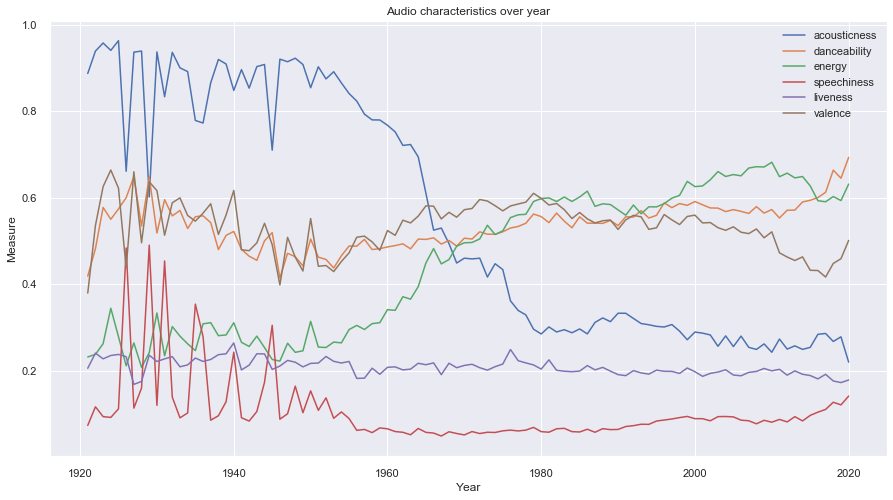

In [14]:
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = df.groupby("year")[col].mean()
    sns.set(style='dark',)
    sns.set(rc={'figure.figsize':(15,8)})
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over year')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')

In [15]:
df_artist = pd.read_csv("data_by_artist.csv")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

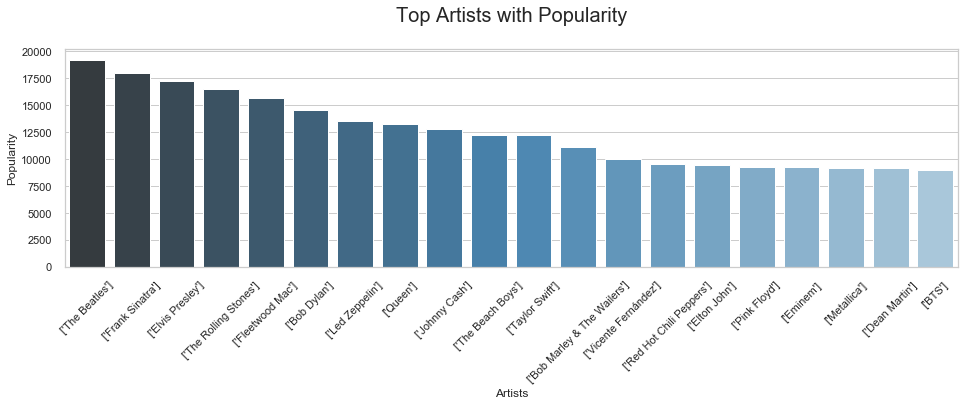

In [16]:
plt.figure(figsize=(16, 4))
sns.set(style="whitegrid")
x = df.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x.index, x,palette="Blues_d")
ax.set_title('Top Artists with Popularity',y=1.1,fontsize=20)
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 45)

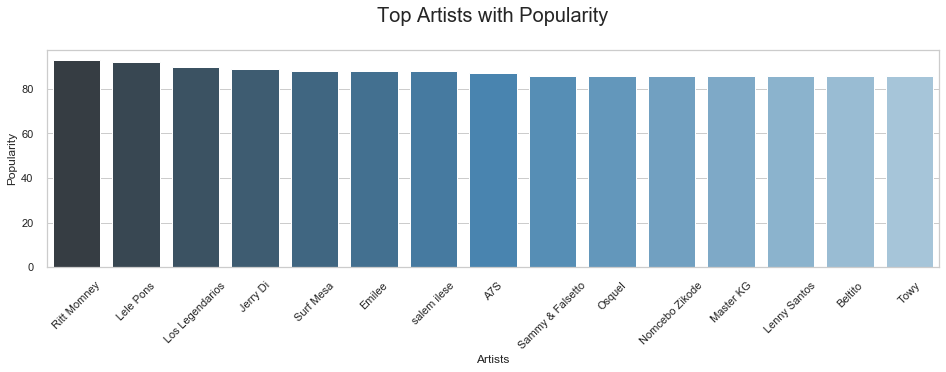

In [17]:
#sns.set(style="whitegrid")
x = df_artist.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(15)
fig = plt.figure(figsize=(16, 4))
ax = sns.barplot(x.index, x,palette="Blues_d")
plt.title('Top Artists with Popularity',y=1.1,fontsize=20)
plt.ylabel('Popularity')
plt.xlabel('Artists')
plt.xticks(rotation = 45)
ax.axes.get_xaxis().set_visible(True)

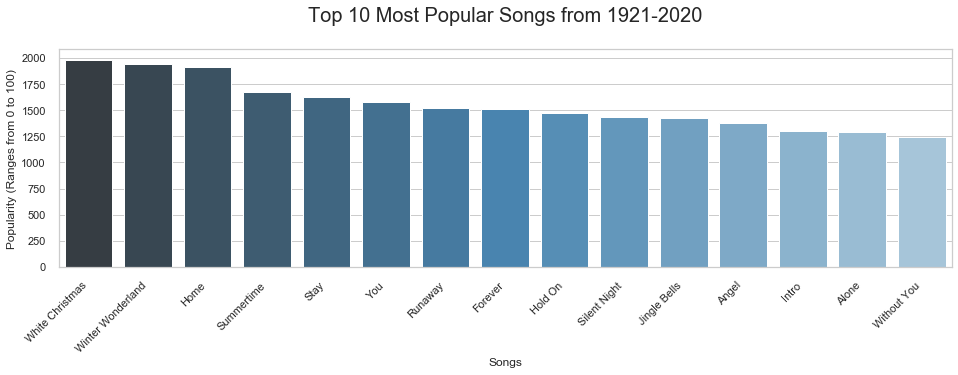

In [18]:
pop = df.groupby("name")["popularity"].sum().sort_values(ascending=False).head(15)
fig = plt.figure(figsize=(16,4))
ax = sns.barplot(pop.index,pop,palette="Blues_d")
plt.xticks(rotation=45,ha='right')
plt.title('Top 10 Most Popular Songs from 1921-2020',y=1.1,fontsize=20)
plt.xlabel('Songs')
plt.ylabel('Popularity (Ranges from 0 to 100)')
ax.axes.get_xaxis().set_visible(True)

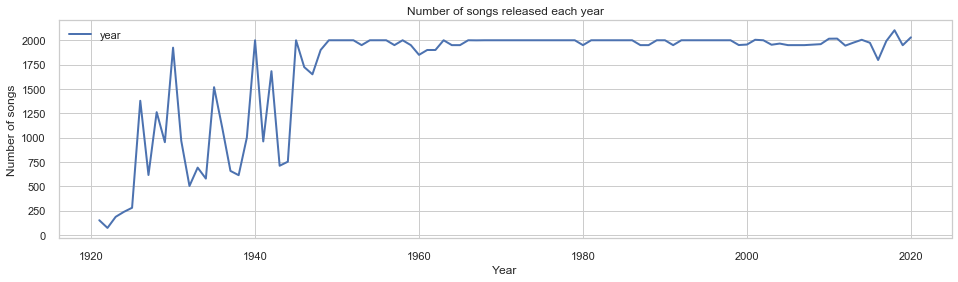

In [19]:
year = pd.DataFrame(df['year'].value_counts())
year = year.sort_index()
ax=year.plot(kind='line',figsize=(16,4), linewidth=2)
plt.title("Number of songs released each year")
plt.xlabel('Year')
plt.ylabel('Number of songs')
ax.axes.get_xaxis().set_visible(True)

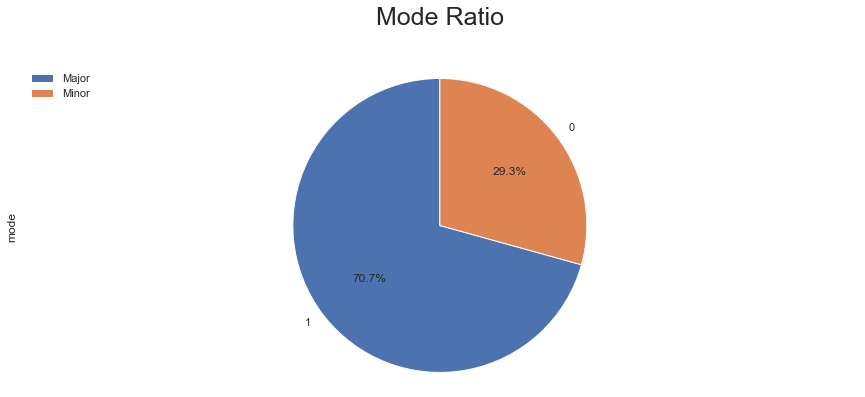

In [20]:
mode = pd.DataFrame(df['mode'].value_counts())
mode['mode'].plot(kind='pie',
            figsize=(15, 6),
            autopct='%1.1f%%', 
            startangle=90)
plt.title('Mode Ratio',y=1.1,fontsize=25) 
plt.axis('equal') 
plt.legend(labels=['Major','Minor'], loc='upper left') 
plt.show()

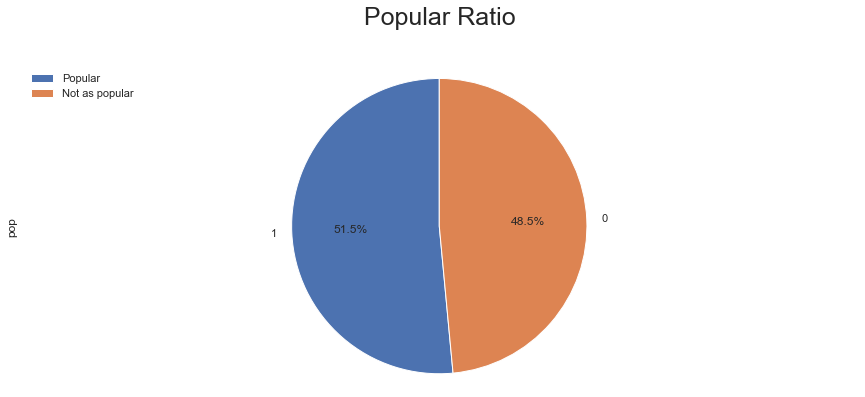

In [21]:
pop = pd.DataFrame(df['pop'].value_counts())
pop['pop'].plot(kind='pie',
            figsize=(15, 6),
            autopct='%1.1f%%', 
            startangle=90)
plt.title('Popular Ratio',y=1.1,fontsize=25) 
plt.axis('equal') 
plt.legend(labels=['Popular','Not as popular'], loc='upper left') 
plt.show()

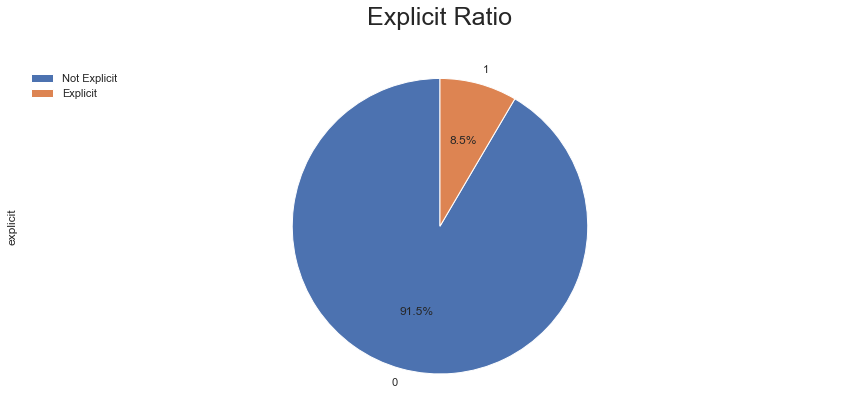

In [22]:
ex = pd.DataFrame(df['explicit'].value_counts())
ex['explicit'].plot(kind='pie',
            figsize=(15, 6),
            autopct='%1.1f%%', 
            startangle=90)
plt.title('Explicit Ratio',y=1.1,fontsize=25) 
plt.axis('equal') 
plt.legend(labels=['Not Explicit','Explicit'], loc='upper left') 
plt.show()

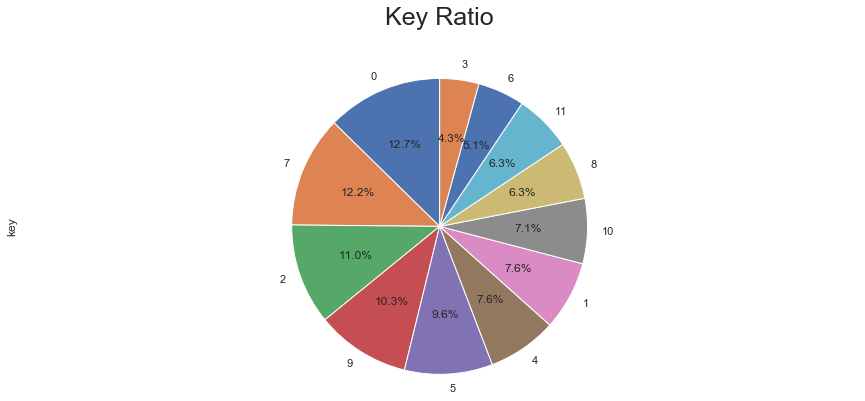

In [23]:
key = pd.DataFrame(df['key'].value_counts())
key['key'].plot(kind='pie',
            figsize=(15, 6),
            autopct='%1.1f%%', 
            startangle=90)
plt.title('Key Ratio',y=1.1,fontsize=25) 
plt.axis('equal') 
#plt.legend(labels=['Not Explicit','Explicit'], loc='upper left') 
plt.show()

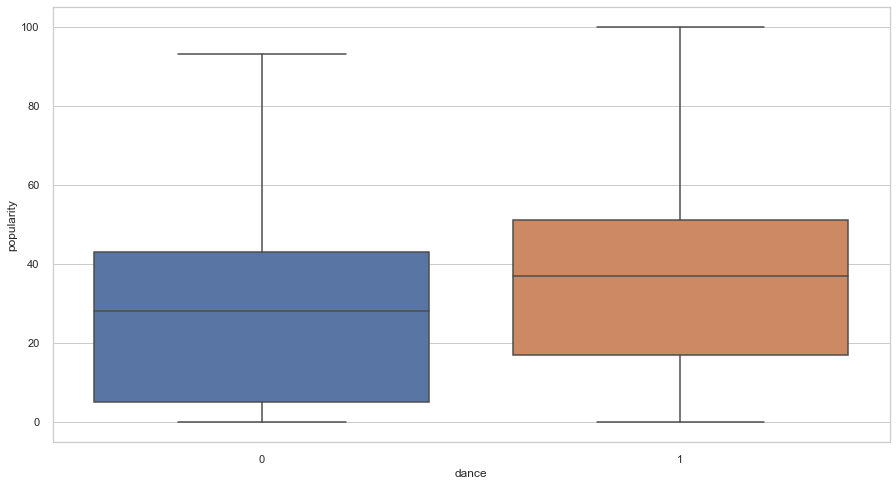

In [24]:
df['dance'] = np.where(df['danceability']<0.5, 0, 1)
ax = sns.boxplot(x="dance", y="popularity", data=df)

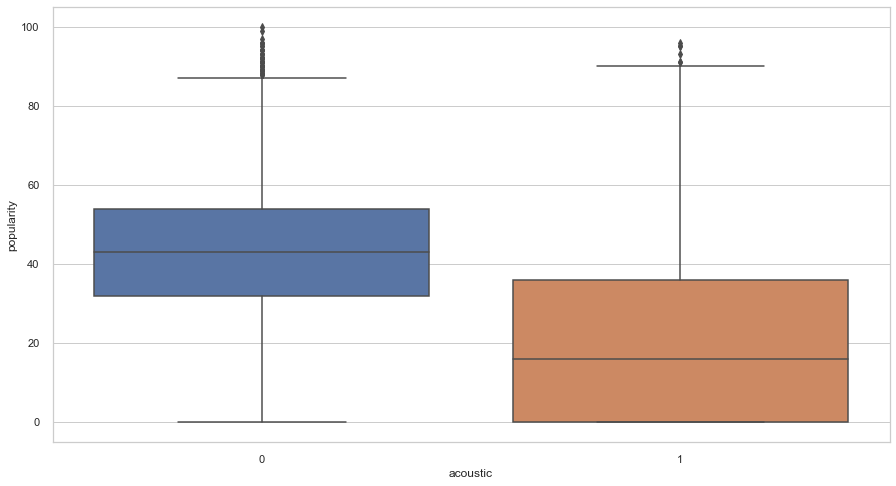

In [25]:
df['acoustic'] = np.where(df['acousticness']<0.5, 0, 1)
ax = sns.boxplot(x="acoustic", y="popularity", data=df)

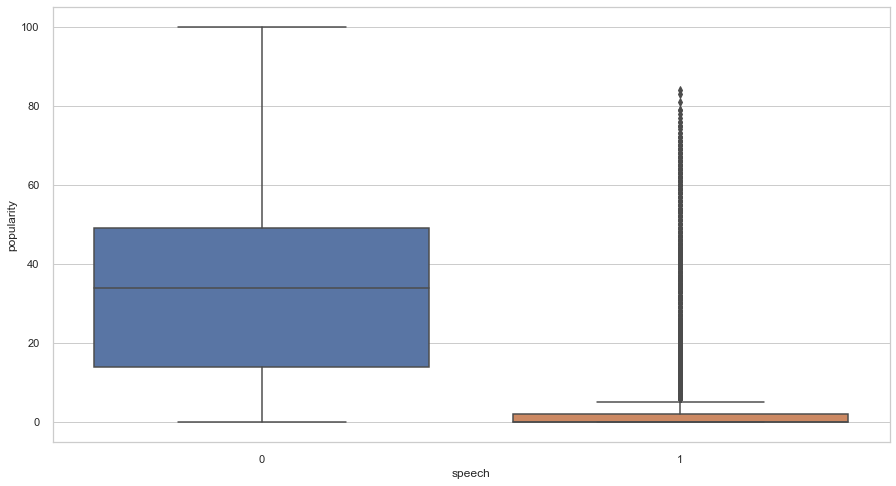

In [26]:
df['speech'] = np.where(df['speechiness']<0.5, 0, 1)
ax = sns.boxplot(x="speech", y="popularity", data=df)

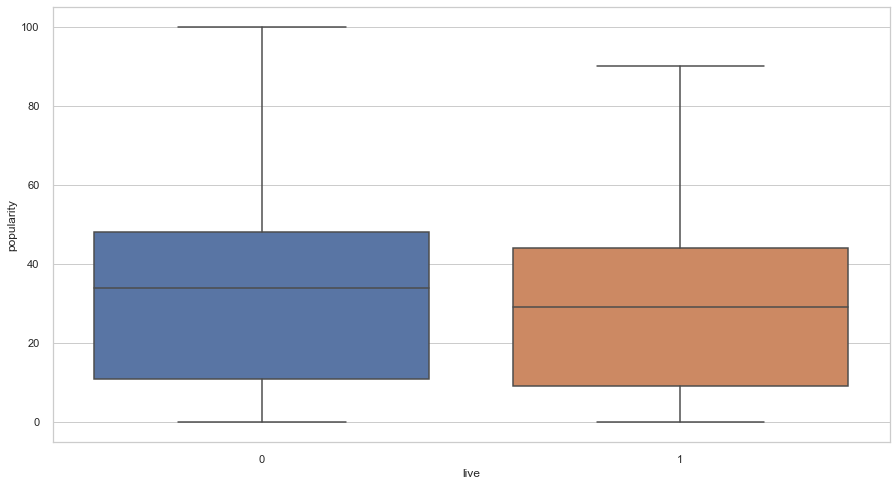

In [32]:
df['live'] = np.where(df['liveness']<0.5, 0, 1)
ax = sns.boxplot(x="live", y="popularity", data=df)

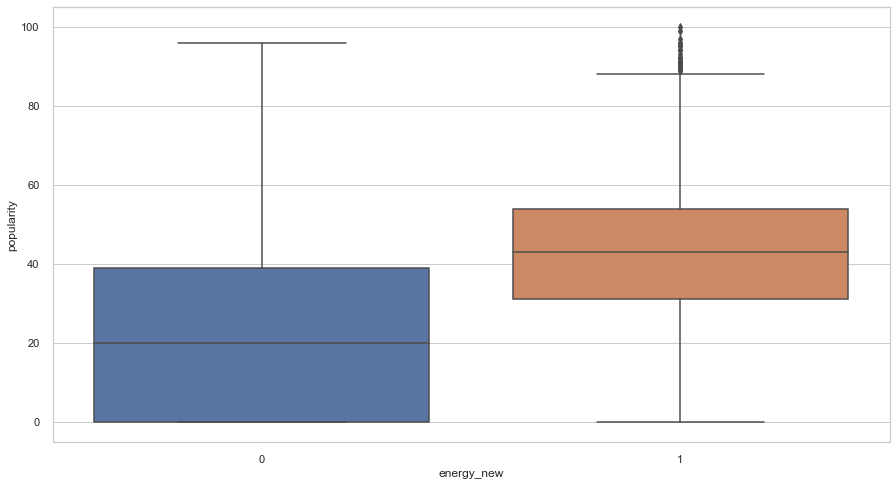

In [28]:
df['energy_new'] = np.where(df['energy']<0.5, 0, 1)
ax = sns.boxplot(x="energy_new", y="popularity", data=df)

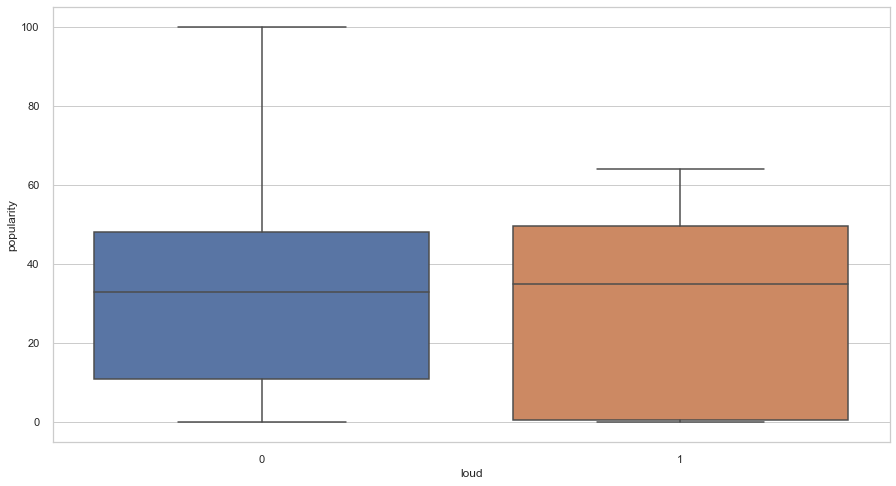

In [29]:
df['loud'] = np.where(df['loudness']<0.5, 0, 1)
ax = sns.boxplot(x="loud", y="popularity", data=df)

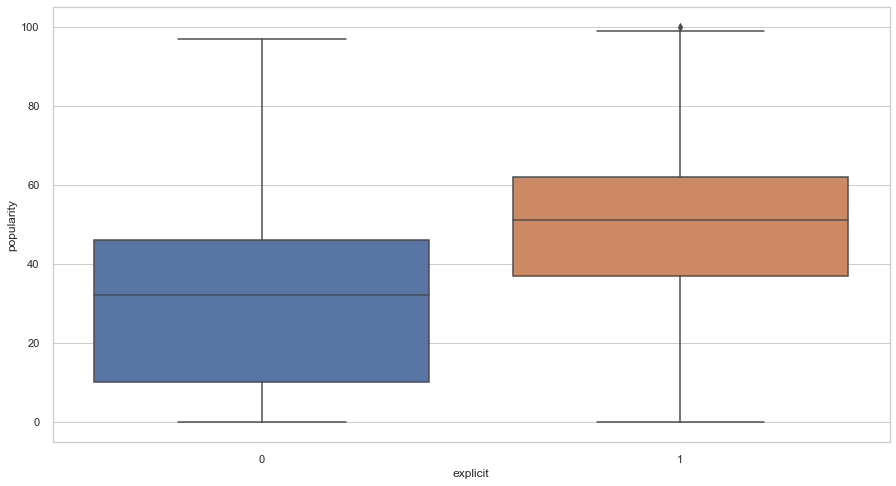

In [30]:
#df['explicit_'] = np.where(df['explicit']<0.5, 0, 1)
ax = sns.boxplot(x="explicit", y="popularity", data=df)

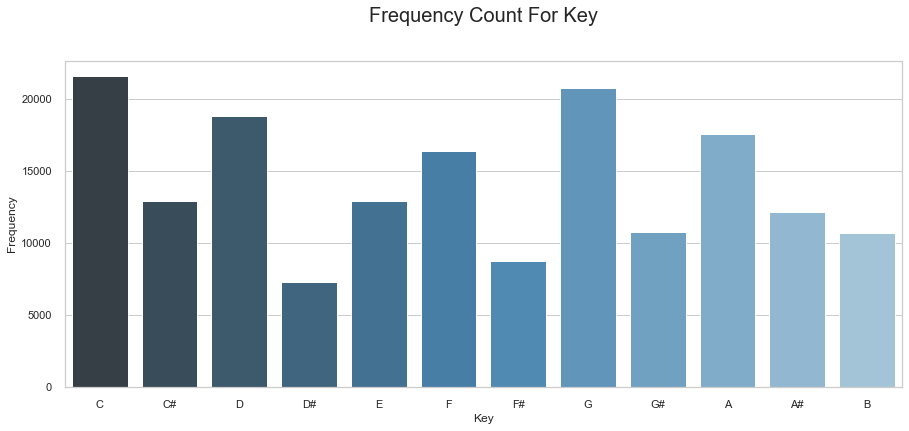

In [21]:
key = pd.DataFrame(df['key'].value_counts()).reset_index().sort_values('index')
key.replace({'index' : { 0 : 'C', 1 : 'C#', 2 : 'D', 3 : 'D#', 4 : 'E', 5 : 'F', 6 : 'F#', 
                        7 : 'G', 8 : 'G#', 9 : 'A', 10 : 'A#', 11 : 'B'}} , inplace=True)
fig = plt.figure(figsize=(15,6))
ax = sns.barplot(key['index'],key['key'],palette="Blues_d")
plt.title('Frequency Count For Key',y=1.1,fontsize=20)
plt.xlabel('Key')
plt.ylabel('Frequency')
ax.axes.get_xaxis().set_visible(True)

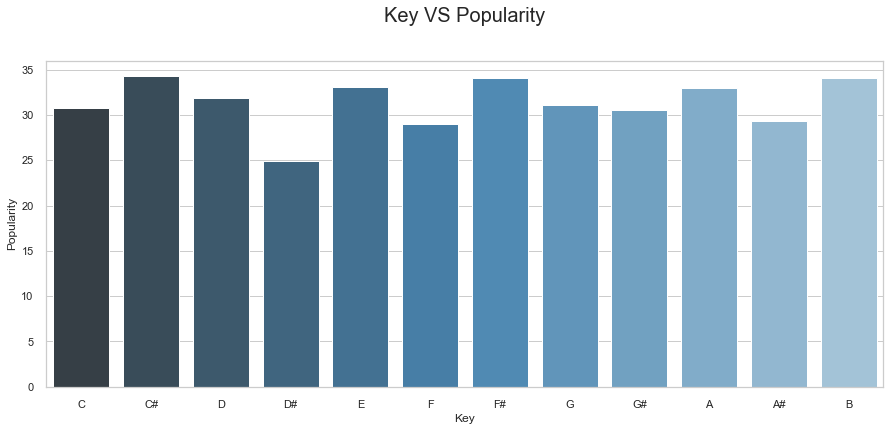

In [22]:
keypop = pd.DataFrame(df.groupby('key')['popularity'].mean()).reset_index()
keypop.replace({'key' : { 0 : 'C', 1 : 'C#', 2 : 'D', 3 : 'D#', 4 : 'E', 5 : 'F', 6 : 'F#', 
                        7 : 'G', 8 : 'G#', 9 : 'A', 10 : 'A#', 11 : 'B'}} , inplace=True)

fig = plt.figure(figsize=(15,6))
ax = sns.barplot(keypop['key'], keypop['popularity'],palette="Blues_d")
plt.title('Key VS Popularity',y=1.1,fontsize=20)
plt.xlabel('Key')
plt.ylabel('Popularity')
ax.axes.get_xaxis().set_visible(True)

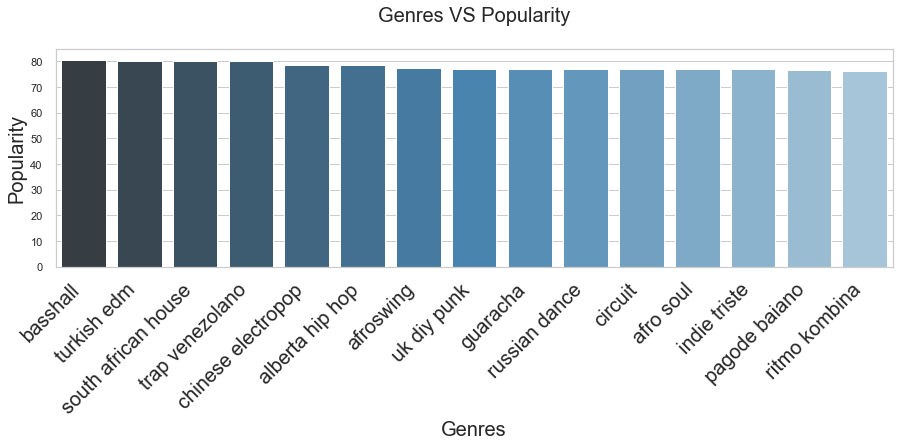

In [23]:
x = df_genre.groupby("genres")["popularity"].sum().sort_values(ascending=False).head(15)
fig = plt.figure(figsize=(15,4))
ax = sns.barplot(x.index, x,palette="Blues_d")
plt.title('Genres VS Popularity',y=1.1,fontsize=20)
plt.xlabel('Genres',fontsize=20)
plt.ylabel('Popularity',fontsize=20)
plt.xticks(fontsize=20,rotation=45,ha='right')
ax.axes.get_xaxis().set_visible(True)

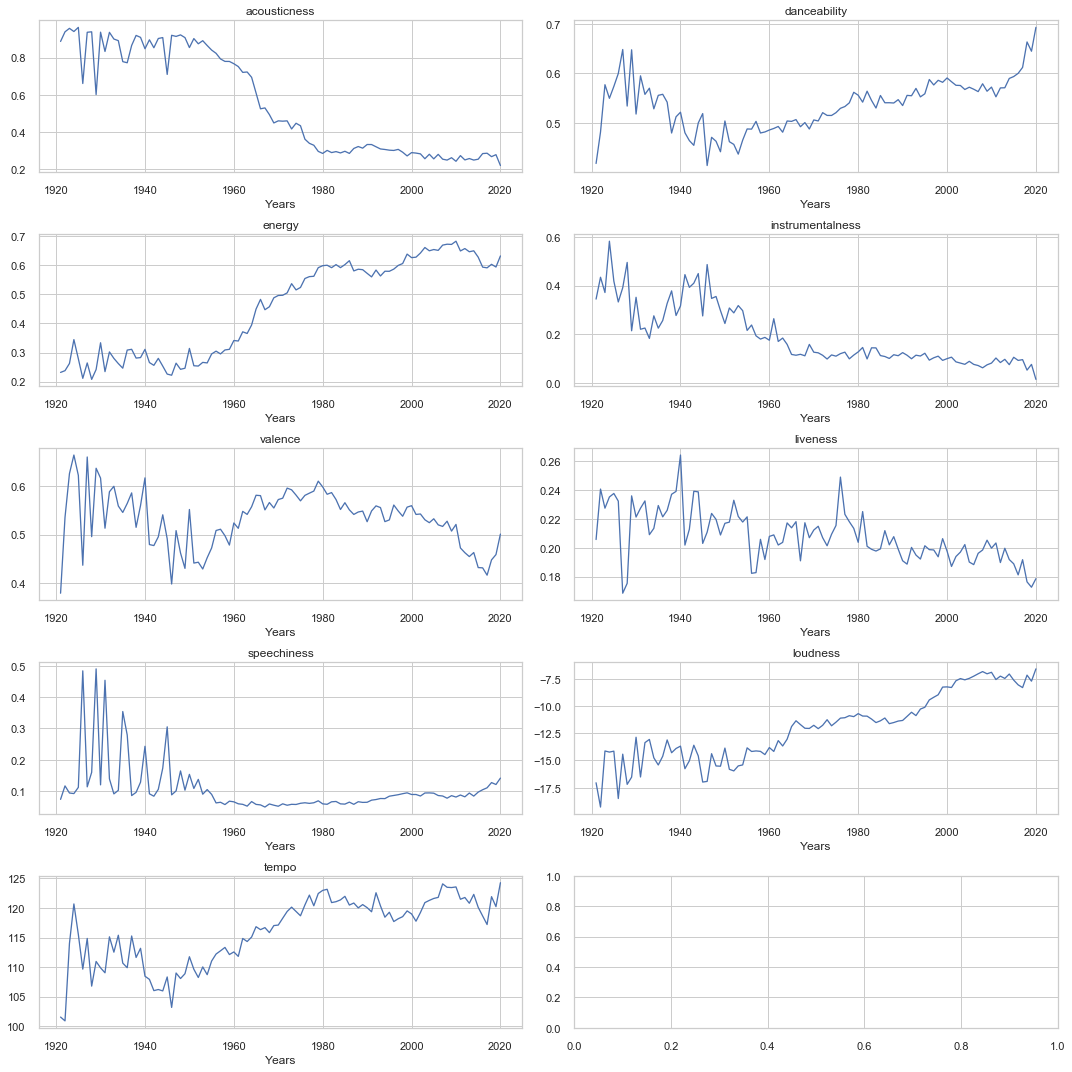

In [24]:
%matplotlib inline
COL_NUM = 2
ROW_NUM = 5
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(15,15))

features = ['acousticness','danceability','energy','instrumentalness','valence','liveness','speechiness','loudness','tempo']
for i in features:
    ax = axes[int(features.index(i)/COL_NUM), features.index(i)%COL_NUM]
    feature= df.groupby('year')[i].mean().reset_index()
    ax.plot('year',i,data=feature,linewidth=1.3)
    ax.set_title(i)
    ax.set_xlabel('Years')
plt.tight_layout() 

In [25]:
df_genre.corr()

,mode,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,duration_min
mode,1.000000,0.077347,-0.071240,-0.080352,-0.012662,-0.002650,-0.063706,-0.059127,-0.042931,-0.010258,-0.031231,-0.060109,-0.053197
acousticness,0.077347,1.000000,-0.324991,-0.868274,0.273739,-0.076570,-0.737276,-0.086139,-0.397713,-0.178210,-0.458698,-0.078815,-0.014075
danceability,-0.071240,-0.324991,1.000000,0.299780,-0.383102,-0.055147,0.453062,0.242052,0.082869,0.652546,0.217992,0.029551,-0.160634
energy,-0.080352,-0.868274,0.299780,1.000000,-0.324940,0.168233,0.848965,0.119791,0.430825,0.305166,0.337795,0.097165,-0.048158
instrumentalness,-0.012662,0.273739,-0.383102,-0.324940,1.000000,-0.050615,-0.537669,-0.196763,-0.201663,-0.424091,-0.265449,-0.069317,0.229421
liveness,-0.002650,-0.076570,-0.055147,0.168233,-0.050615,1.000000,0.123946,0.190136,0.002285,0.000730,-0.094178,0.007308,0.018624
loudness,-0.063706,-0.737276,0.453062,0.848965,-0.537669,0.123946,1.000000,0.095298,0.407985,0.376577,0.344361,0.082991,-0.137574
speechiness,-0.059127,-0.086139,0.242052,0.119791,-0.196763,0.190136,0.095298,1.000000,0.001446,0.092680,-0.045217,0.022326,0.033226
tempo,-0.042931,-0.397713,0.082869,0.430825,-0.201663,0.002285,0.407985,0.001446,1.000000,0.139589,0.146717,0.081608,-0.046840
valence,-0.010258,-0.178210,0.652546,0.305166,-0.424091,0.000730,0.376577,0.092680,0.139589,1.000000,0.023072,0.063637,-0.257517


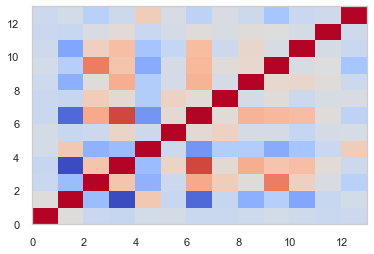

In [26]:
plt.pcolor(df_genre.corr(),cmap='coolwarm') #https://matplotlib.org/examples/color/colormaps_reference.html
plt.show()

In [27]:
df_genre2=pd.read_csv("data_w_genres.csv")

In [28]:
df_genre2.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,28680.000000,28680.000000,2.868000e+04,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000
mean,0.498373,0.546490,2.388780e+05,0.497488,0.174756,0.202441,-11.140498,0.094014,115.844830,0.512723,34.060945,5.412901,0.759170,13.847211
std,0.370614,0.176474,1.211318e+05,0.254885,0.298406,0.140884,5.771749,0.111986,25.003834,0.244421,22.376438,3.480552,0.427595,53.372544
min,0.000000,0.000000,1.879550e+04,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.122296,0.431000,1.823304e+05,0.283568,0.000004,0.110363,-13.972292,0.039200,99.366500,0.329000,12.000000,2.000000,1.000000,2.000000
50%,0.478458,0.557000,2.186400e+05,0.504000,0.001880,0.161000,-10.088938,0.052200,115.357400,0.523243,39.000000,6.000000,1.000000,3.000000
75%,0.896000,0.675000,2.684670e+05,0.702783,0.215291,0.247000,-6.889000,0.095300,129.848750,0.703000,51.000000,8.000000,1.000000,8.000000
max,0.996000,0.986000,5.403500e+06,1.000000,1.000000,0.991000,1.342000,0.964000,217.743000,0.991000,93.000000,11.000000,1.000000,3169.000000


In [29]:
index_name=df_genre2[df_genre2['genres']=="[]"].index
df_genre2.drop(index_name,inplace=True)

In [30]:
df_genre2['duration_min'] = df_genre2['duration_ms']/60000
df_genre2.drop(['duration_ms'],axis=1,inplace=True)

In [31]:
df_genre2.corr()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,duration_min
acousticness,1.000000,-0.387807,-0.803282,0.331713,-0.042605,-0.659817,-0.089721,-0.261421,-0.257588,-0.469206,-0.039828,0.110129,0.073213,-0.003510
danceability,-0.387807,1.000000,0.362739,-0.379418,-0.108980,0.475952,0.267208,0.097021,0.607796,0.257147,0.036452,-0.103378,-0.046723,-0.138871
energy,-0.803282,0.362739,1.000000,-0.346217,0.155757,0.800987,0.119440,0.318086,0.399940,0.356416,0.042207,-0.091695,-0.065889,-0.043822
instrumentalness,0.331713,-0.379418,-0.346217,1.000000,-0.042445,-0.530140,-0.163946,-0.166253,-0.328218,-0.223144,-0.034537,-0.022177,0.018161,0.150853
liveness,-0.042605,-0.108980,0.155757,-0.042445,1.000000,0.074176,0.186309,-0.022796,-0.018885,-0.081023,-0.013556,0.016584,0.023334,-0.000068
loudness,-0.659817,0.475952,0.800987,-0.530140,0.074176,1.000000,0.096102,0.298964,0.396050,0.350357,0.035504,-0.057648,-0.051283,-0.113876
speechiness,-0.089721,0.267208,0.119440,-0.163946,0.186309,0.096102,1.000000,0.009622,0.083362,0.035335,0.007903,-0.077584,-0.016384,-0.016126
tempo,-0.261421,0.097021,0.318086,-0.166253,-0.022796,0.298964,0.009622,1.000000,0.202712,0.103435,0.007861,-0.003752,-0.008195,-0.044827
valence,-0.257588,0.607796,0.399940,-0.328218,-0.018885,0.396050,0.083362,0.202712,1.000000,0.002103,0.047469,-0.004647,0.001084,-0.194411
popularity,-0.469206,0.257147,0.356416,-0.223144,-0.081023,0.350357,0.035335,0.103435,0.002103,1.000000,0.006986,-0.112473,-0.123719,-0.058270


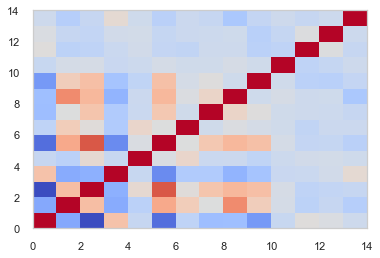

In [32]:
plt.pcolor(df_genre2.corr(),cmap='coolwarm') #https://matplotlib.org/examples/color/colormaps_reference.html
plt.show()

In [33]:
len(df_genre['key'].unique())

12

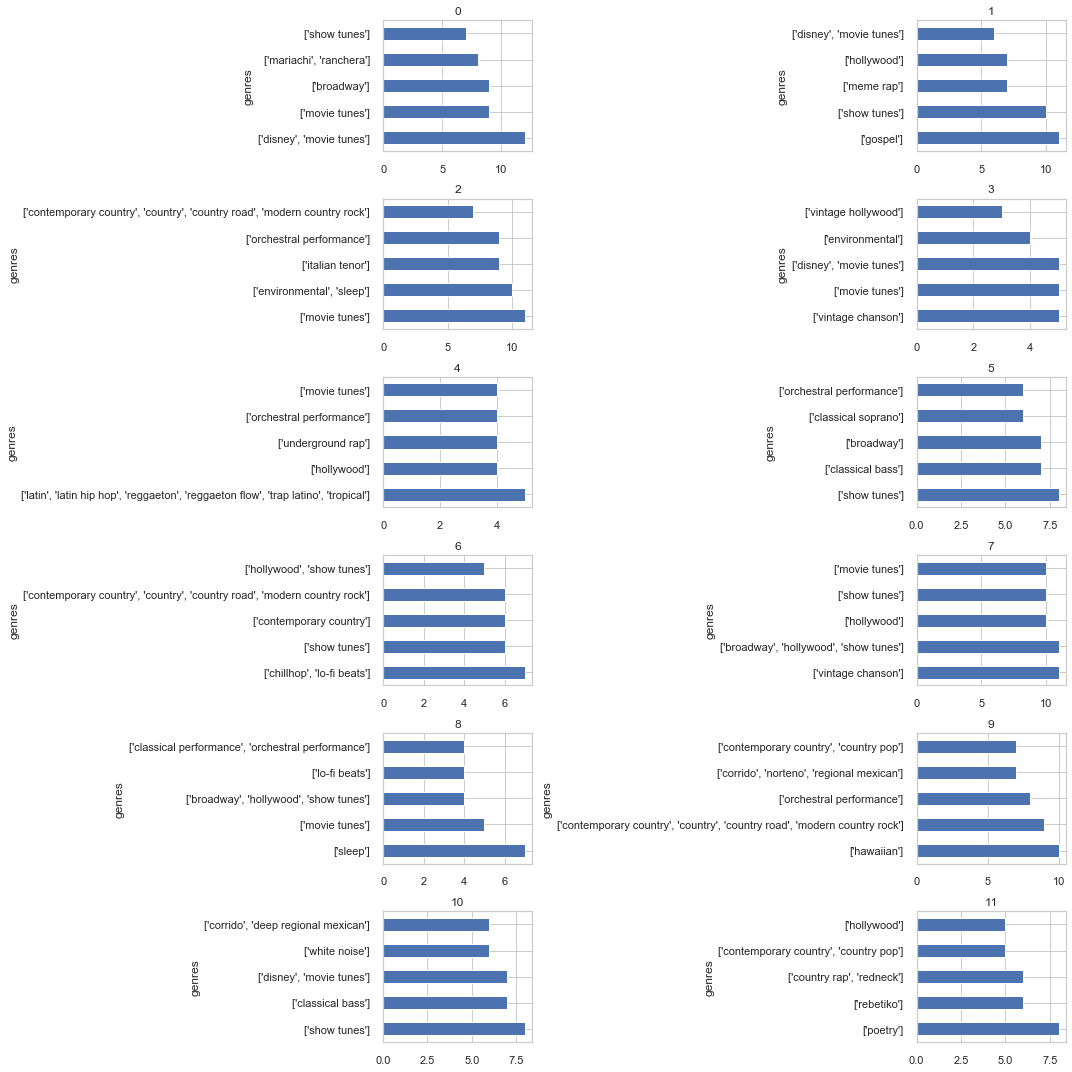

In [34]:
#top genres for each key
key_genre = df_genre2.groupby(['genres','key']).size().unstack()
%matplotlib inline
COL_NUM = 2
ROW_NUM = 6
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(15,15))

for i, (key,genre_count) in enumerate(key_genre.items()): 
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    genre_count = genre_count.sort_values(ascending=False)[:5] 
    genre_count.plot(kind='barh',ax=ax)
    ax.set_title(key)

plt.tight_layout() 

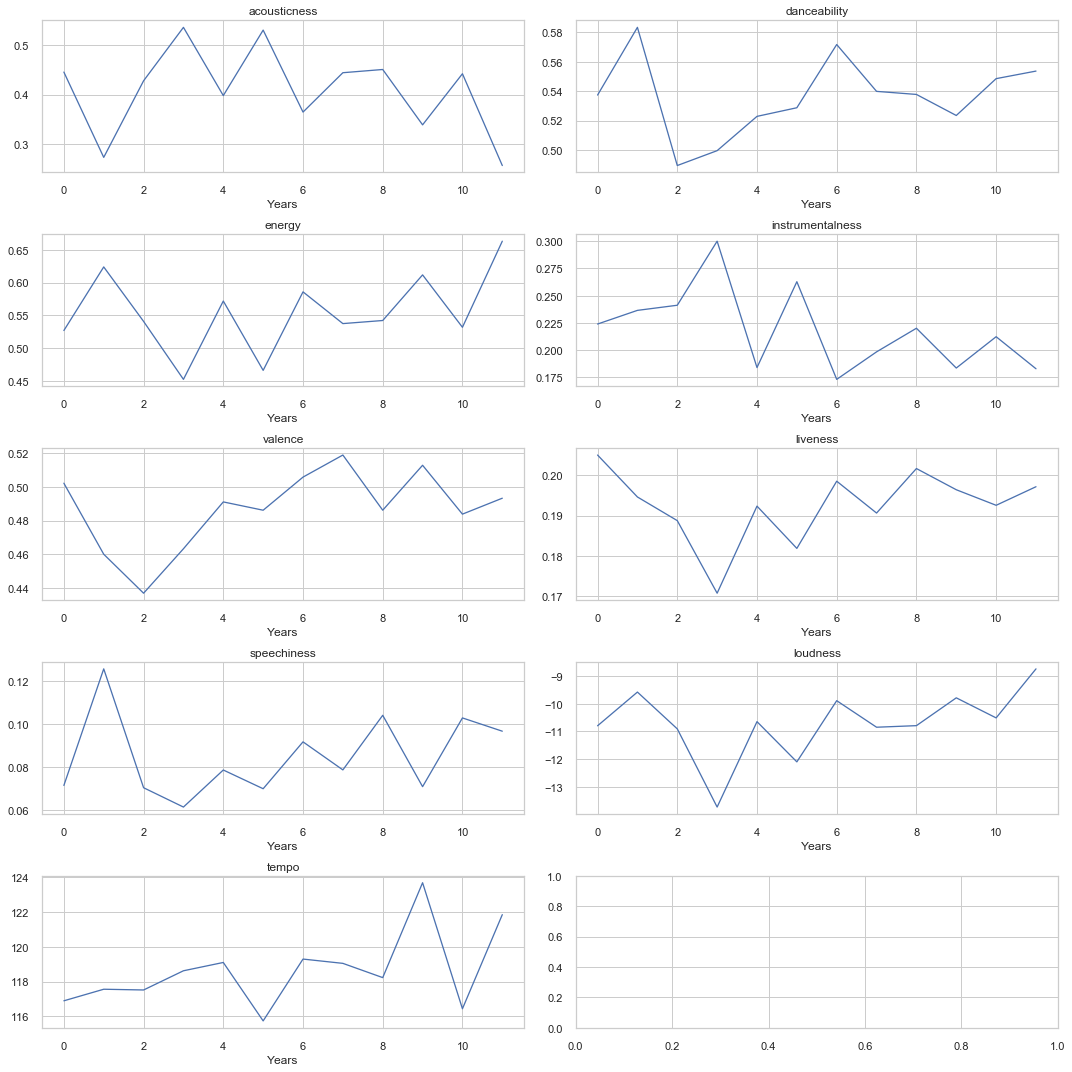

In [36]:
#key and features
%matplotlib inline
COL_NUM = 2
ROW_NUM = 5
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(15,15))

features = ['acousticness','danceability','energy','instrumentalness','valence','liveness','speechiness','loudness','tempo']
for i in features:
    ax = axes[int(features.index(i)/COL_NUM), features.index(i)%COL_NUM]
    genre= df_genre.groupby('key')[i].mean().reset_index()
    ax.plot('key',i,data=genre,linewidth=1.3)
    ax.set_title(i)
    ax.set_xlabel('Years')
plt.tight_layout() 

/Users/susanshang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


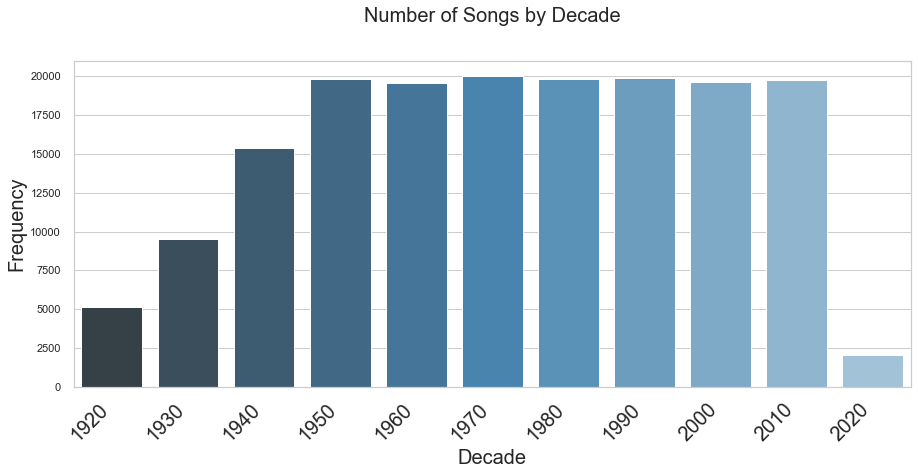

In [37]:
df['decade'] = (df['year']//10)*10
df['popularity_range'] = (df['popularity']//10)*10
df[df['popularity_range'] == 100]['popularity_range'] = 90
decade = pd.DataFrame(df['decade'].value_counts()).reset_index().sort_values('index')
fig = plt.figure(figsize=(15,6))
ax = sns.barplot(decade['index'], decade['decade'],palette="Blues_d")
plt.title('Number of Songs by Decade',y=1.1,fontsize=20)
plt.xlabel('Decade',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=20,rotation=45,ha='right')
ax.axes.get_xaxis().set_visible(True)

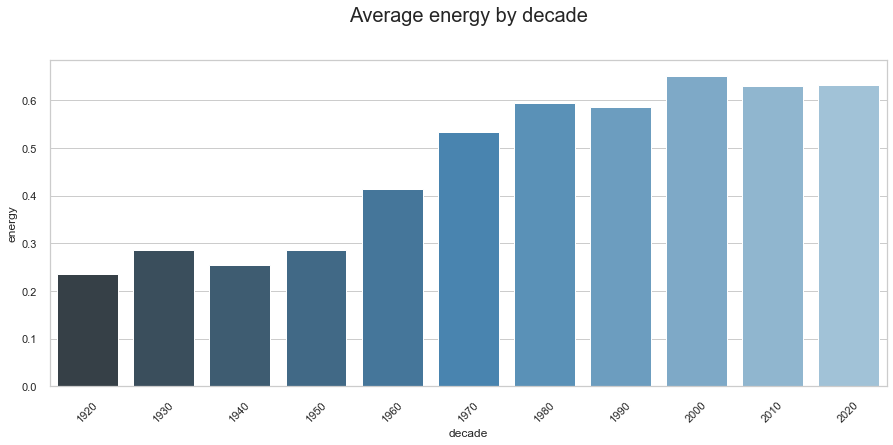

In [38]:
x = df.groupby("decade")["energy"].mean()
fig = plt.figure(figsize=(15, 6))
ax = sns.barplot(x.index, x,palette="Blues_d")
plt.title('Average energy by decade',y=1.1,fontsize=20)
plt.ylabel('energy')
plt.xlabel('decade')
plt.xticks(rotation = 45)
ax.axes.get_xaxis().set_visible(True)

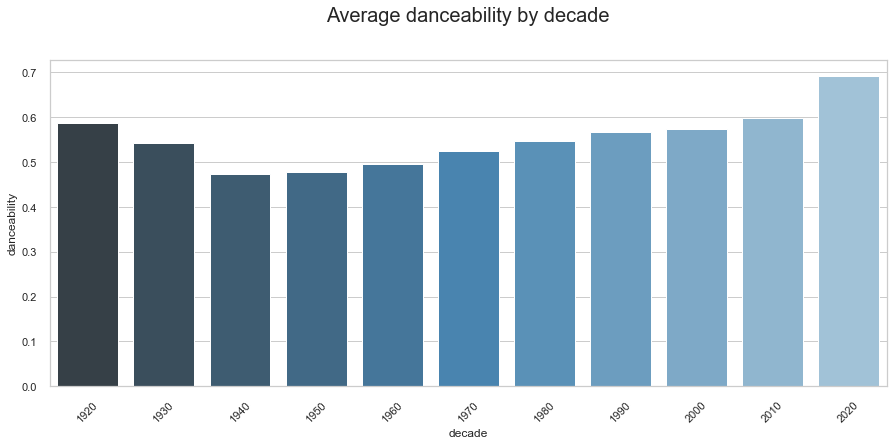

In [39]:
x = df.groupby("decade")["danceability"].mean()
fig = plt.figure(figsize=(15, 6))
ax = sns.barplot(x.index, x,palette="Blues_d")
plt.title('Average danceability by decade',y=1.1,fontsize=20)
plt.ylabel('danceability')
plt.xlabel('decade')
plt.xticks(rotation = 45)
ax.axes.get_xaxis().set_visible(True)

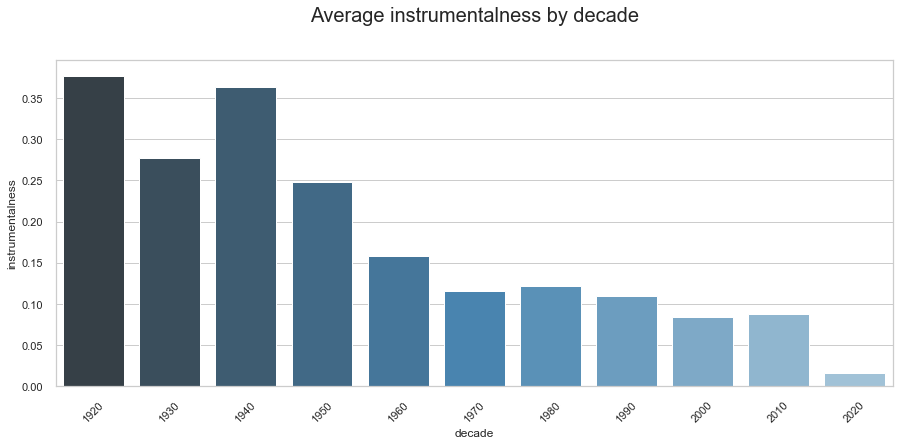

In [40]:
x = df.groupby("decade")["instrumentalness"].mean()
fig = plt.figure(figsize=(15, 6))
ax = sns.barplot(x.index, x,palette="Blues_d")
plt.title('Average instrumentalness by decade',y=1.1,fontsize=20)
plt.ylabel('instrumentalness')
plt.xlabel('decade')
plt.xticks(rotation = 45)
ax.axes.get_xaxis().set_visible(True)

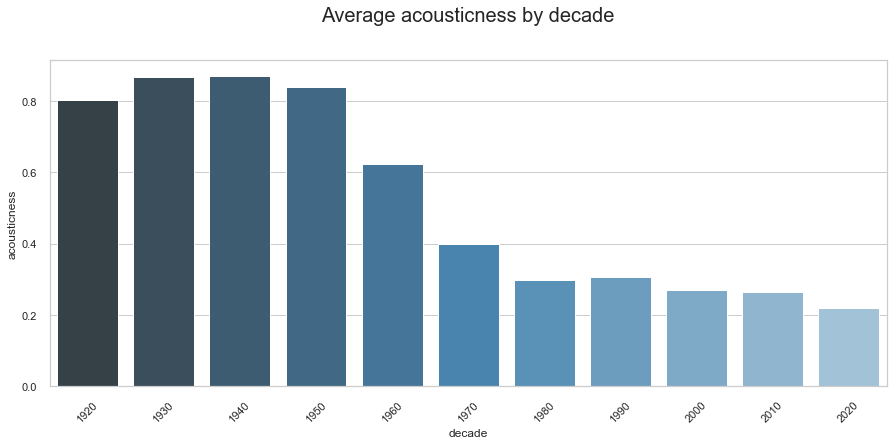

In [41]:
x = df.groupby("decade")["acousticness"].mean()
fig = plt.figure(figsize=(15, 6))
ax = sns.barplot(x.index, x,palette="Blues_d")
plt.title('Average acousticness by decade',y=1.1,fontsize=20)
plt.ylabel('acousticness')
plt.xlabel('decade')
plt.xticks(rotation = 45)
ax.axes.get_xaxis().set_visible(True)

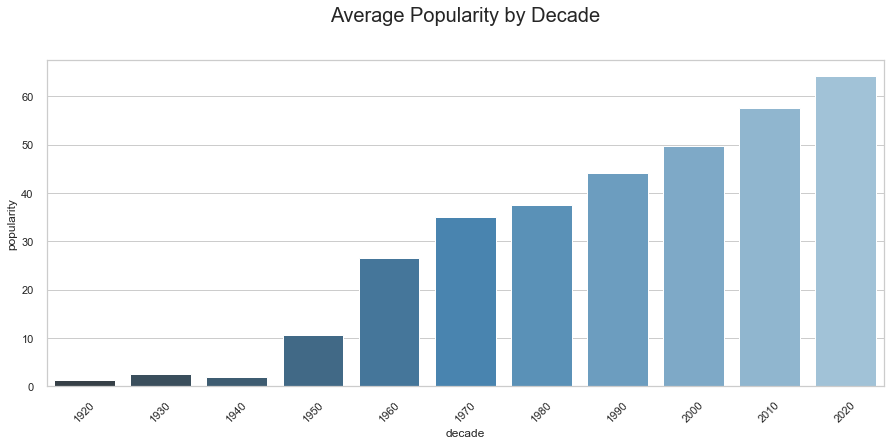

In [42]:
x = df.groupby("decade")["popularity"].mean()
fig = plt.figure(figsize=(15, 6))
ax = sns.barplot(x.index, x,palette="Blues_d")
plt.title('Average Popularity by Decade',y=1.1,fontsize=20)
plt.ylabel('popularity')
plt.xlabel('decade')
plt.xticks(rotation = 45)
ax.axes.get_xaxis().set_visible(True)

In [43]:
df.popularity_range.replace([0,10,20,30,40,50,60,70,80,90,100], ['0-10','10-20','20-30','30-40','40-50','50-60','60-70',
                                                            '70-80','80-90','90-100','90-100'], inplace=True)

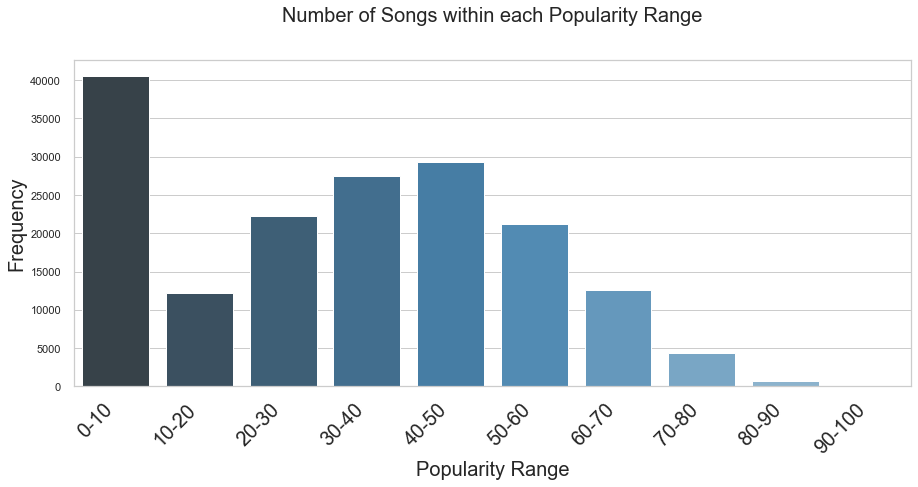

In [44]:
pop_range = pd.DataFrame(df['popularity_range'].value_counts()).reset_index().sort_values('index')

fig = plt.figure(figsize=(15,6))
ax = sns.barplot(pop_range['index'], pop_range['popularity_range'],palette="Blues_d")
plt.title('Number of Songs within each Popularity Range',y=1.1,fontsize=20)
plt.xlabel('Popularity Range',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=20,rotation=45,ha='right')
ax.axes.get_xaxis().set_visible(True)

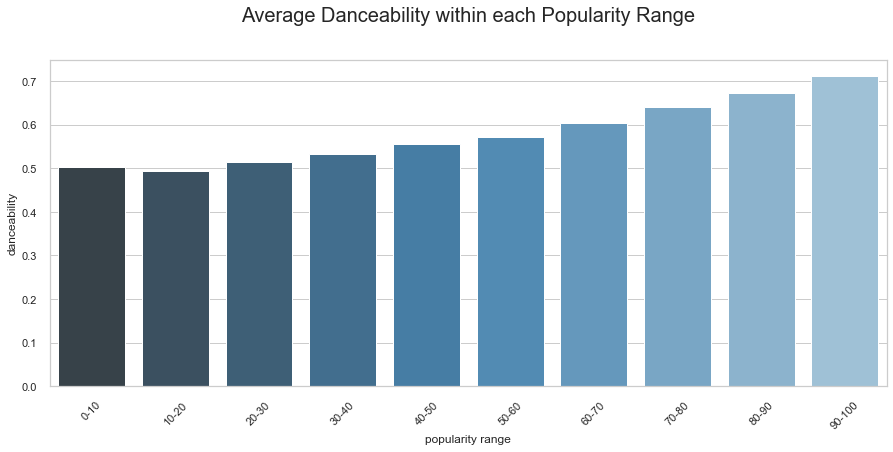

In [45]:
x = df.groupby('popularity_range')["danceability"].mean()
fig = plt.figure(figsize=(15, 6))
ax = sns.barplot(x.index, x,palette="Blues_d")
plt.title('Average Danceability within each Popularity Range',y=1.1,fontsize=20)
plt.ylabel('danceability')
plt.xlabel('popularity range')
plt.xticks(rotation = 45)
ax.axes.get_xaxis().set_visible(True)

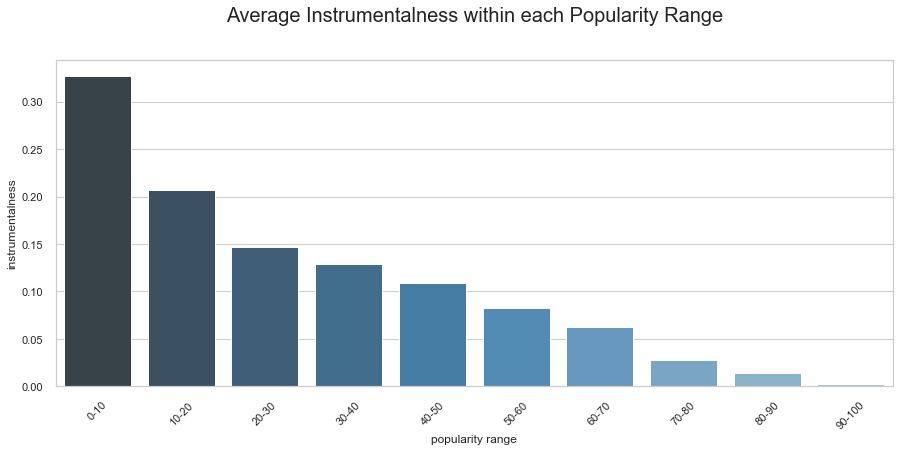

In [46]:
x = df.groupby('popularity_range')["instrumentalness"].mean()
fig = plt.figure(figsize=(15, 6))
ax = sns.barplot(x.index, x,palette="Blues_d")
plt.title('Average Instrumentalness within each Popularity Range',y=1.1,fontsize=20)
plt.ylabel('instrumentalness')
plt.xlabel('popularity range')
plt.xticks(rotation = 45)
ax.axes.get_xaxis().set_visible(True)

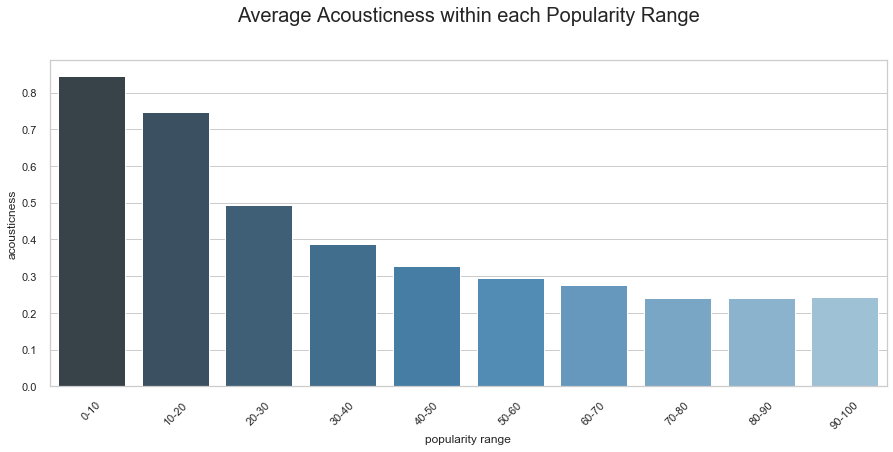

In [47]:
x = df.groupby('popularity_range')["acousticness"].mean()
fig = plt.figure(figsize=(15, 6))
ax = sns.barplot(x.index, x,palette="Blues_d")
plt.title('Average Acousticness within each Popularity Range',y=1.1,fontsize=20)
plt.ylabel('acousticness')
plt.xlabel('popularity range')
plt.xticks(rotation = 45)
ax.axes.get_xaxis().set_visible(True)

In [48]:
test_df = df[['valence', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']]

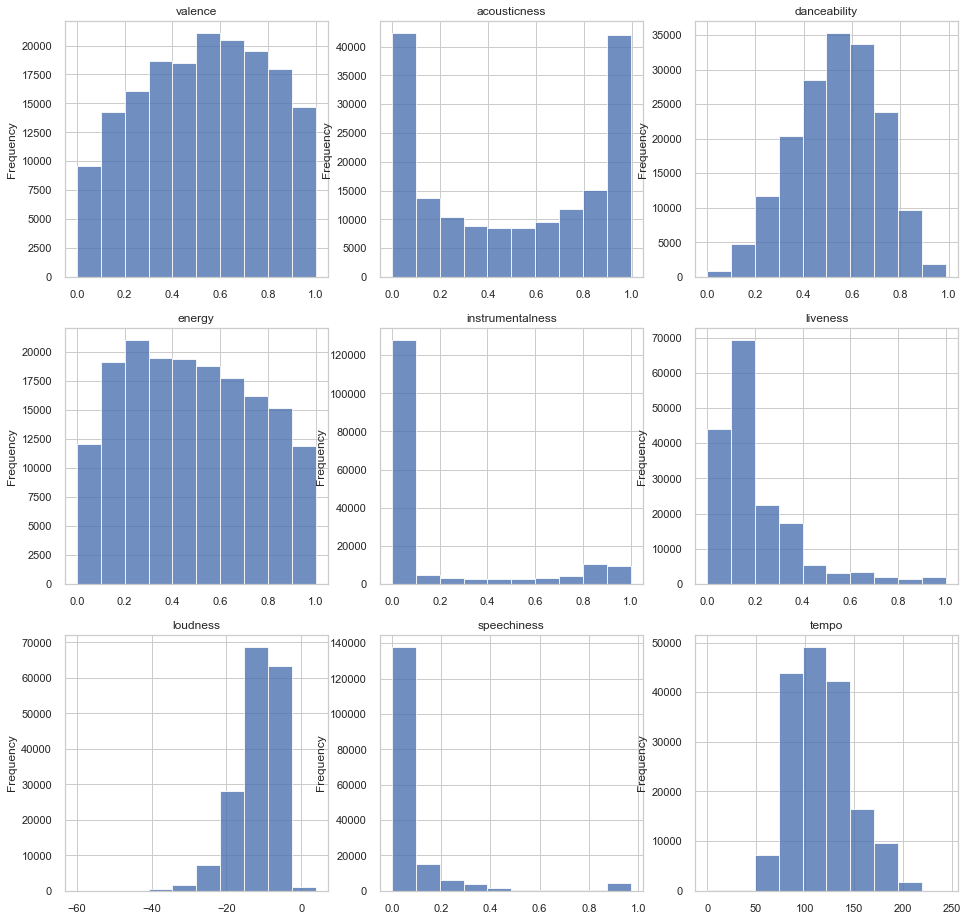

In [49]:
plt.figure(figsize=(16, 16))
t = 1
for i in test_df.columns:
    plt.subplot(3, 3, t)
    plt.title(i)
    df[i].plot(kind="hist", alpha=0.8)
    t+=1

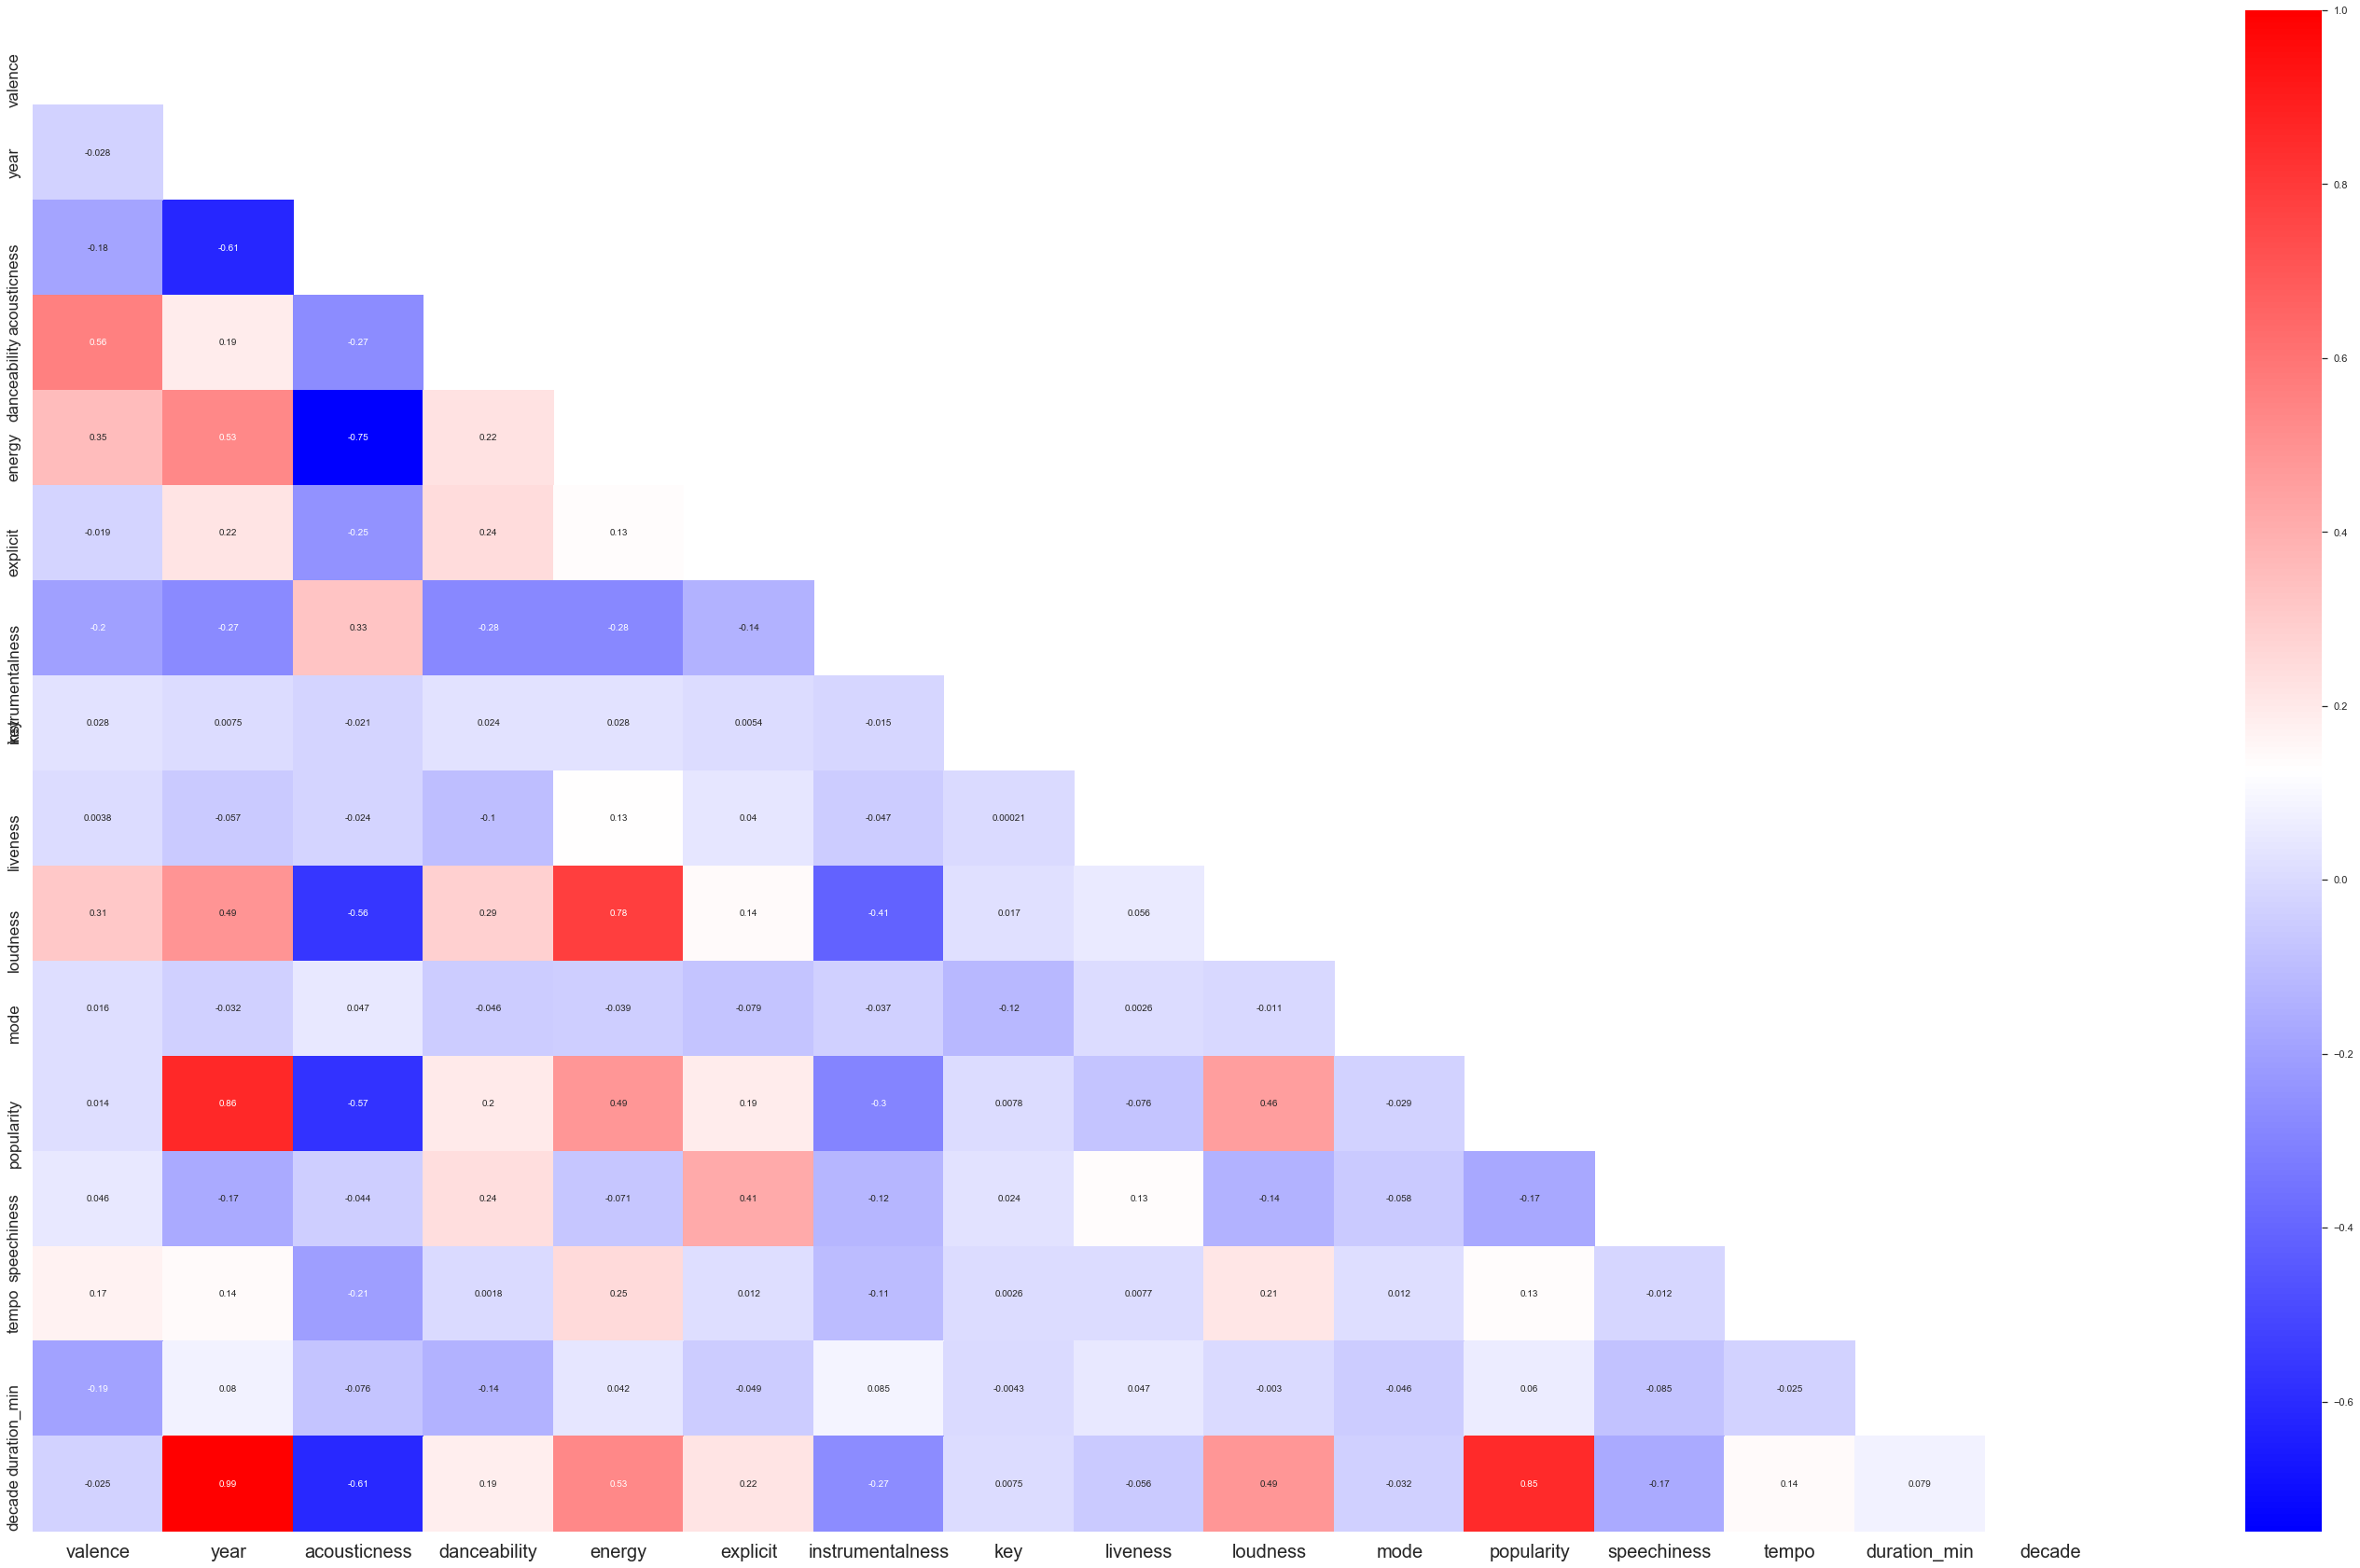

In [56]:
#plt.figure(figsize = (15, 13))
corr = df.corr()
fix, ax = plt.subplots(figsize=(50,30))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr, mask=mask, ax=ax, annot= True, cmap='bwr')
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=20)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=17)
plt.savefig('heatmap', dpi=300)
plt.show()

#sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
